In [4]:
# Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Etape à adapter selon le chemin du fichier
# Chargement du fichier
allocine = pd.read_excel(r"C:\Users\maoui\OneDrive\Documents\Data Scientest\DTS - Projet\allocine_dataviz_final.xlsx")
allocine.head()

,ID,titre,titre_original,acteurs,acteur_1,acteur_2,acteur_3,acteur_4,realisateur,real_1,...,date2,annee,jour_split,mois_split,annee_split,actors_score,directors_score,scenaristes_score,distrib_score,budget_dollars
0,270572,Petta,PETTA,"Rajinikanth, Vijay Sethupathi, Nawazuddin Sidd...",Rajinikanth,Vijay Sethupathi,Nawazuddin Siddiqui,Bobby Simha,Karthik Subbaraj,Karthik Subbaraj,...,2019-01-10,2019.0,10.0,1.0,2019.0,0.455621,1.125524,0.141740,0.01495,1.0
1,293378,Les SEGPA,LES SEGPA,"Ichem Bougheraba, Walid Ben Amar, Arriles Amra...",Ichem Bougheraba,Walid Ben Amar,Arriles Amrani,Kader Bueno,"Ali Bougheraba, Hakim Bougheraba",Ali Bougheraba,...,2022-04-20,2022.0,20.0,4.0,2022.0,0.135466,1.055201,0.000000,0.01473,1.0
2,246253,L'Amant D'un Jour,L'AMANT D'UN JOUR,"Eric Caravaca, Esther Garrel, Louise Chevillot...",Eric Caravaca,Esther Garrel,Louise Chevillotte,Felix Kysyl,Philippe Garrel,Philippe Garrel,...,2017-05-31,2017.0,31.0,5.0,2017.0,0.559548,1.983822,0.978035,0.00998,2.0
3,280918,L'Homme parfait,L'HOMME PARFAIT,"Didier Bourdon, Pierre-Francois Martin-Laval, ...",Didier Bourdon,Pierre-Francois Martin-Laval,Valerie Karsenti,Philippe Duquesne,Xavier Durringer,Xavier Durringer,...,2022-06-22,2022.0,22.0,6.0,2022.0,0.632422,1.379569,0.437381,0.01664,4.0
4,310521,Testament,TESTAMENT,"Remy Girard, Sophie Lorain, Marie-Mai, Guylain...",Remy Girard,Sophie Lorain,Marie-Mai,Guylaine Tremblay,Denys Arcand,Denys Arcand,...,2023-11-22,2023.0,22.0,11.0,2023.0,0.459392,1.840676,0.905899,0.02466,6.0


In [3]:
# Vérification du nombre de valeurs manquantes et du type des variables
allocine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390 entries, 0 to 6389
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       6390 non-null   int64         
 1   titre                    6390 non-null   object        
 2   titre_original           6390 non-null   object        
 3   acteurs                  6018 non-null   object        
 4   acteur_1                 6018 non-null   object        
 5   acteur_2                 5951 non-null   object        
 6   acteur_3                 5898 non-null   object        
 7   acteur_4                 5834 non-null   object        
 8   realisateur              6390 non-null   object        
 9   real_1                   6390 non-null   object        
 10  real_2                   575 non-null    object        
 11  genres                   6390 non-null   object        
 12  genre_1                  6390 non-

In [6]:
# Calcul du nombre de lignes et de colonnes
allocine.shape

(6390, 39)

In [7]:
# Description de la variable cible: Première Semaine France
description_table = pd.DataFrame(allocine["premiere_semaine_france"].describe())

# Afficher le tableau
description_table

,premiere_semaine_france
count,6.390000e+03
mean,1.551592e+05
std,3.074077e+05
min,5.000000e+00
25%,8.623750e+03
50%,4.957450e+04
75%,1.650505e+05
max,3.906694e+06


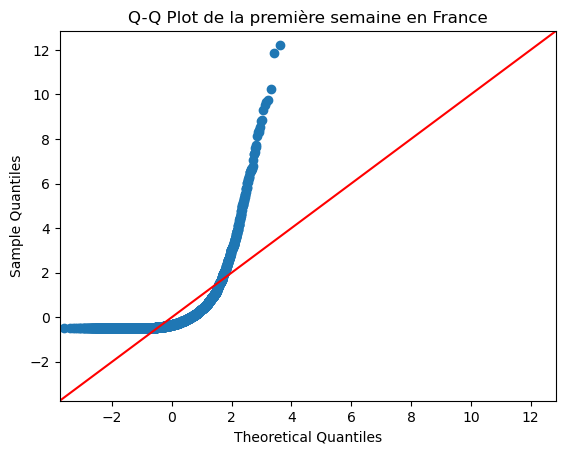

In [18]:
# Q-Q plot de la première semaine en France

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Nettoyer les données en excluant les valeurs non finies
filtered_data = allocine["premiere_semaine_france"].dropna()

# Réaliser le Q-Q plot
sm.qqplot(filtered_data, fit=True, line='45')

# Ajouter des titres et afficher le graphique
plt.title("Q-Q Plot de la première semaine en France")
plt.show()

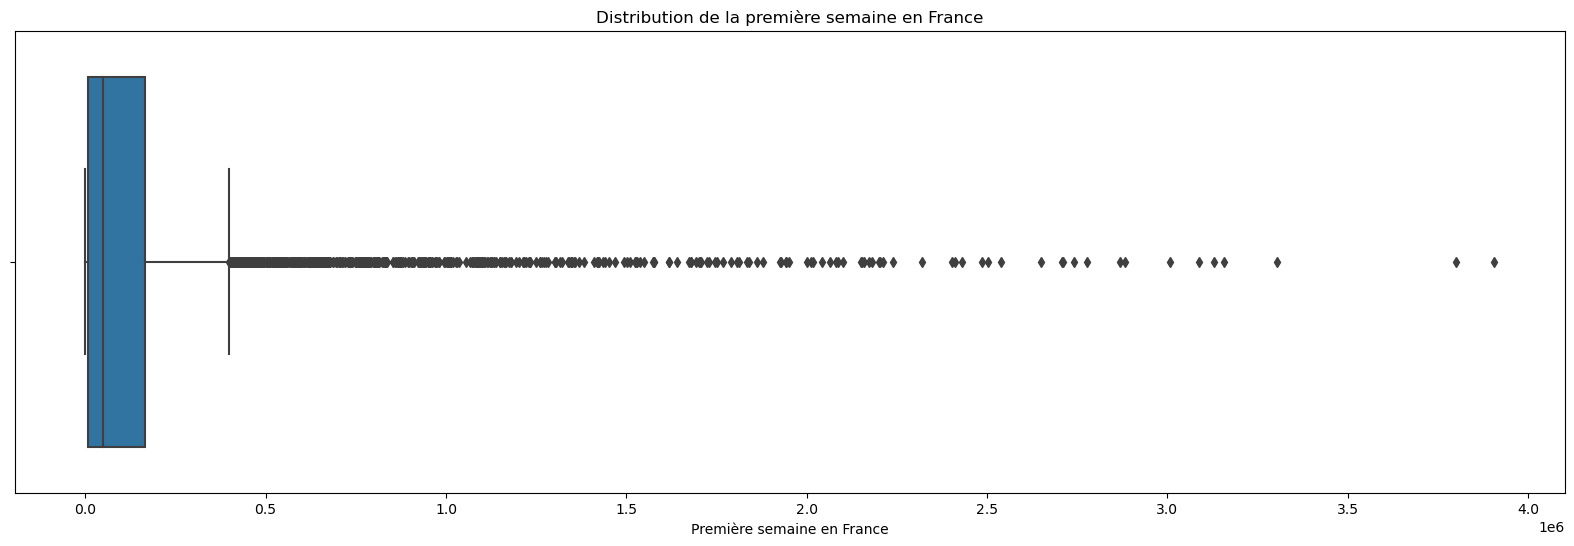

In [19]:
# Visualisation de la distribution de la première semaine France à l'aide d'un boxplot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.boxplot(x = allocine["premiere_semaine_france"]);
plt.title('Distribution de la première semaine en France')
plt.xlabel('Première semaine en France')

plt.show();

In [16]:
# Ces statistiques suggèrent une forte asymétrie dans la distribution des performances des films. 
# La présence de quelques films avec des résultats exceptionnels lors de la première semaine indique que ces films peuvent être des moteurs significatifs pour l'industrie, 
#tandis que la majorité des films ont des performances beaucoup plus modestes.

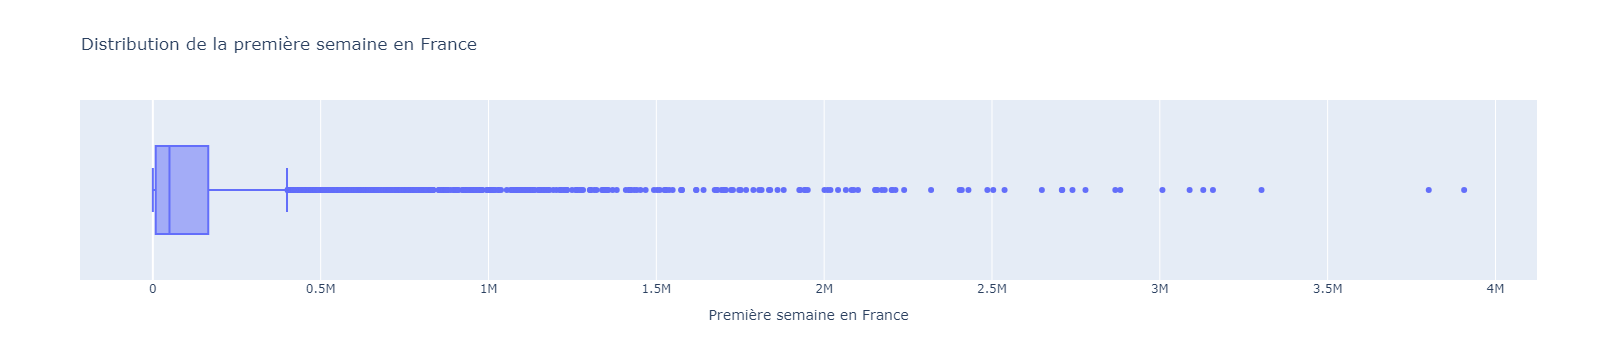

In [14]:
# Visualisation de la distribution de la première semaine France à l'aide d'un boxplot avec plotly

import plotly.express as px

# Création du boxplot horizontal avec Plotly
fig = px.box(allocine, x="premiere_semaine_france",
             hover_data=['titre_original'],
             title='Distribution de la première semaine en France',
             labels={'premiere_semaine_france': 'Première semaine en France'})
fig.show()

In [11]:
# Description de la variable Cumul France (nombre d'entrées réalisées pendant toute l'exploitation du film au cinéma)
description_table_cumul = pd.DataFrame(allocine["cumul_france"].describe())

# Afficher le tableau
description_table_cumul

,cumul_france
count,6.390000e+03
mean,4.214031e+05
std,9.574522e+05
min,5.000000e+00
25%,1.777725e+04
50%,1.010840e+05
75%,3.910245e+05
max,2.032805e+07


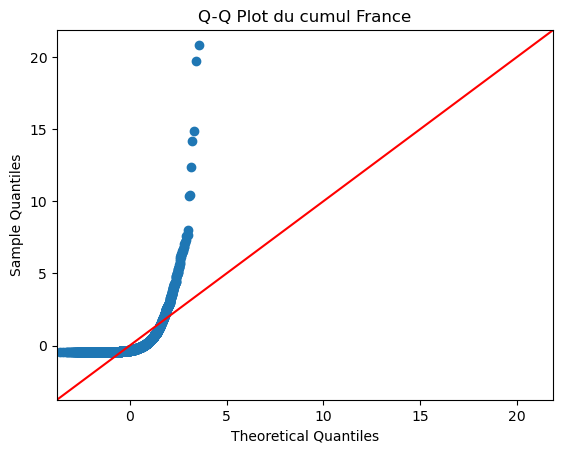

In [21]:
# Q-Q plot du Cumul France

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Nettoyer les données en excluant les valeurs non finies
filtered_data_2 = allocine["cumul_france"].dropna()

# Réaliser le Q-Q plot
sm.qqplot(filtered_data_2, fit=True, line='45')

# Ajouter des titres et afficher le graphique
plt.title("Q-Q Plot du cumul France")
plt.show()

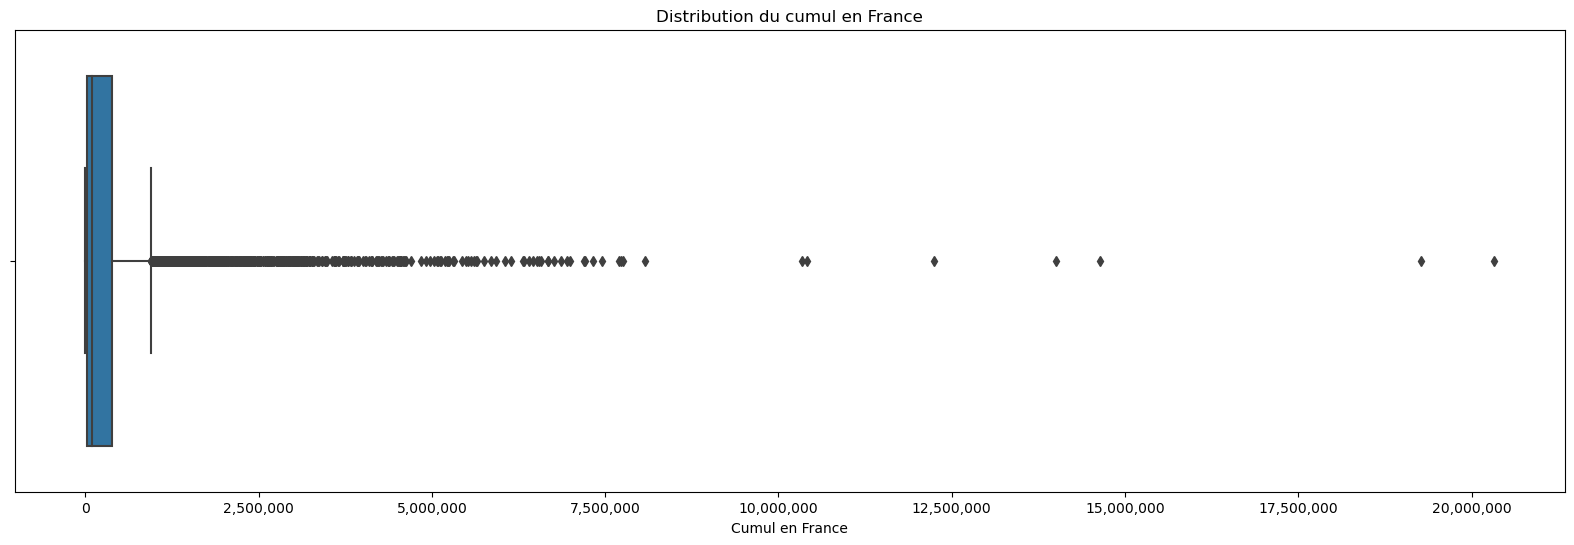

In [22]:
# Visualisation de la distribution du cumul France à l'aide d'un boxplot

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(20, 6))
ax = sns.boxplot(x=allocine["cumul_france"])
plt.title('Distribution du cumul en France')
plt.xlabel('Cumul en France')

# Formatage des étiquettes de l'axe x pour inclure des séparateurs de milliers
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [17]:
# Les résultats du cumul des films varient considérablement, avec certains films ayant des performances bien au-delà ou bien en dessous de la moyenne.
#  La médiane est significativement plus basse que la moyenne (101,084 contre 421,403), ce qui indique une distribution asymétrique avec une queue longue vers les valeurs élevées. 
# Cela signifie que la plupart des films ont des performances relativement modestes, tandis qu'une minorité de films extrêmement populaires tire la moyenne vers le haut.

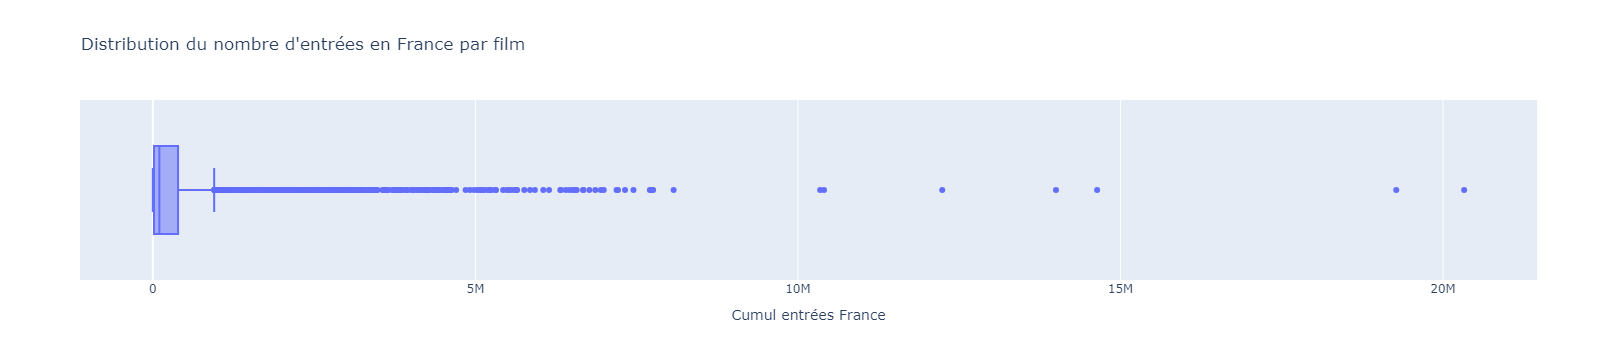

In [15]:
# Visualisation de la distribution du Cumul France à l'aide d'un boxplot avec plotly

import plotly.express as px

fig = px.box(allocine, x="cumul_france", 
             hover_data=['titre_original'],
             title="Distribution du nombre d'entrées en France par film",
             labels={'cumul_france': "Cumul entrées France"})
fig.show()

In [16]:
# Calculer la corrélation entre la première semaine en France et le cumul en France
correlation = allocine['premiere_semaine_france'].corr(allocine['cumul_france'])

print("Corrélation entre la première semaine en France et le cumul en France :", correlation)

Corrélation entre la première semaine en France et le cumul en France : 0.8623680610326859


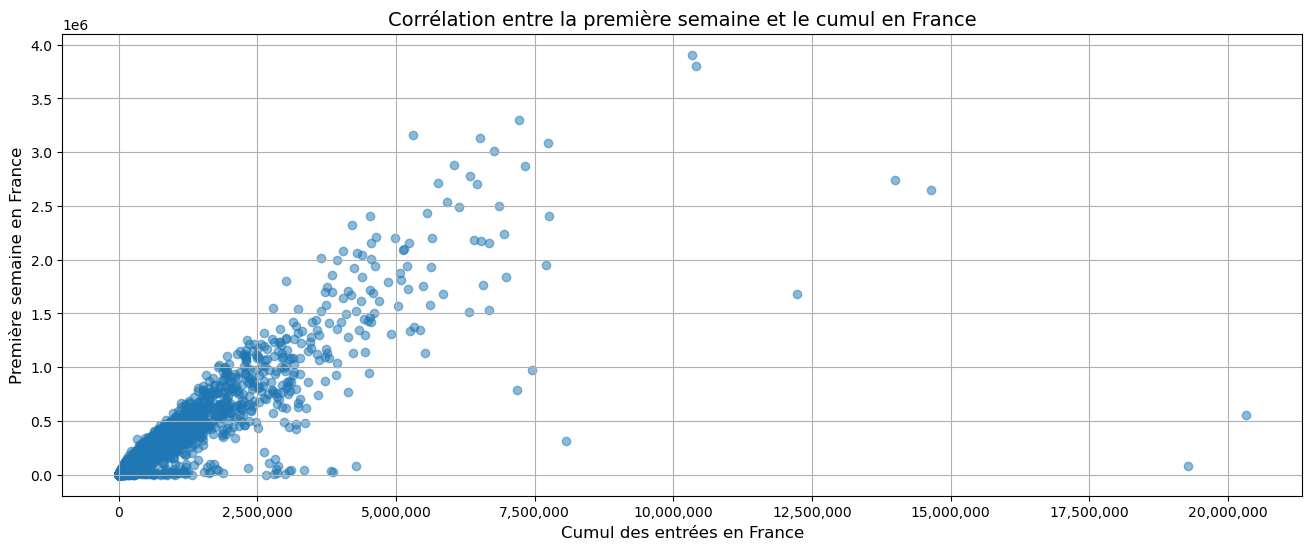

In [23]:
# Création du scatter plot avec matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.scatter(allocine['cumul_france'], allocine['premiere_semaine_france'], alpha=0.5)

# Titre et étiquettes
plt.title('Corrélation entre la première semaine et le cumul en France', fontsize=14)
plt.xlabel('Cumul des entrées en France', fontsize=12)
plt.ylabel('Première semaine en France', fontsize=12)

# Formatage des étiquettes de l'axe x avec des séparateurs de milliers
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Grille pour une meilleure lisibilité
plt.grid(True)

# Afficher le graphique
plt.show()

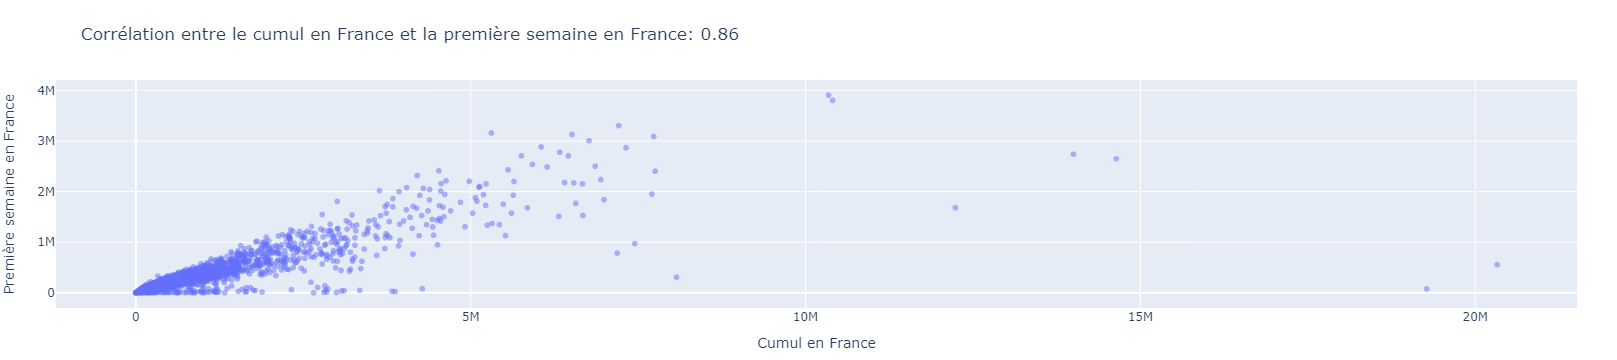

In [24]:
# Création d'un scatter plot avec Plotly, en inversant les axes

import plotly.express as px

fig = px.scatter(
    allocine, 
    x='cumul_france', 
    y='premiere_semaine_france',
    hover_data=['titre_original'],
    title=f'Corrélation entre le cumul en France et la première semaine en France: {correlation:.2f}',
    labels={'cumul_france': 'Cumul en France', 'premiere_semaine_france': 'Première semaine en France'},
    opacity=0.5
)

fig.update_layout(margin={'l': 40, 'b': 40, 't': 80, 'r': 40}, hovermode='closest')
fig.update_xaxes(showgrid=True, title='Cumul en France')
fig.update_yaxes(showgrid=True, title='Première semaine en France')
fig.show()